# Fecal Pellet Production #

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
SoG_center = [450, 550, 200, 300]

In [3]:
prod = xr.open_dataset('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_prod_T_20150701_20150731.nc')

In [9]:
ptrc = xr.open_dataset('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_ptrc_T_20150701_20150731.nc')

In [5]:
dia2 = xr.open_dataset('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_dia2_T_20150701_20150731.nc')

In [44]:
grid = xr.open_dataset('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20150701_20150731.nc')

In [46]:
TQ10 = np.exp(0.07 * (grid.votemper[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] - 20))

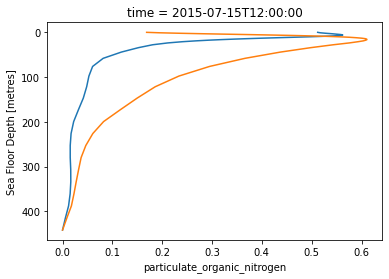

In [23]:
fig, ax = plt.subplots(1, 1)
ptrc.microzooplankton[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]].mean(axis=1).mean(axis=1).plot(
    ax=ax, y='depth', yincrease=False)
ptrc.particulate_organic_nitrogen[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]].mean(axis=1).mean(axis=1).plot(
    ax=ax, y='depth', yincrease=False);

In [7]:
dia2

<xarray.Dataset>
Dimensions:     (depth: 40, gridX: 398, gridY: 898, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2015-07-15T12:00:00
  * depth       (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY       (gridY) int64 0 1 2 3 4 5 6 7 ... 891 892 893 894 895 896 897
  * gridX       (gridX) int64 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
Data variables: (12/14)
    HetMRub     (time, depth, gridY, gridX) float32 ...
    MORTPHY     (time, depth, gridY, gridX) float32 ...
    MORTMRUB    (time, depth, gridY, gridX) float32 ...
    MORTDIAT    (time, depth, gridY, gridX) float32 ...
    GRMESZDIAT  (time, depth, gridY, gridX) float32 ...
    GRMESZMRUB  (time, depth, gridY, gridX) float32 ...
    ...          ...
    GRMESZMICZ  (time, depth, gridY, gridX) float32 ...
    GRMICZDIAT  (time, depth, gridY, gridX) float32 ...
    GRMICZMRUB  (time, depth, gridY, gridX) float32 ...
    GRMICZPHY   (time, depth, gridY, gridX) float32 ...
    GRMICZPON   (time, depth, gridY, gridX) float32 ...
    GRMICZMICZ  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_1m_dia2_T_20150701_20150731
    description:  Month-averaged grazing and mortality variables extracted fr...
    history:      2022-07-29 20:33: Generated by `reshapr extract /results2/S...
    Conventions:  CF-1.6

## From Microzooplankton ##

In [47]:
# Grazing
eff = 0.6
sloppy = 1 - eff
pontrans = 1
trans = 0.47
uZoo_graz_PON = dia2.GRMICZPON[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * pontrans
uZoo_graz_diatoms = dia2.GRMICZDIAT[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * trans
uZoo_graz_uzoo = dia2.GRMICZMICZ[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * trans
uZoo_graz_flag = dia2.GRMICZPHY[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * trans
uZoo_graz_mrub = dia2.GRMICZMRUB[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * trans

# Mortality
mort_rate = 0.5e-6 # at 20o TQ10 is temperature correction
mort_to_PON = (mort_rate * prod.TQ10[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] 
        * ptrc.microzooplankton[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]]) * trans
# problem TQ10 is all nans!
mort_to_PON = (mort_rate * TQ10 
        * ptrc.microzooplankton[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]]) * trans

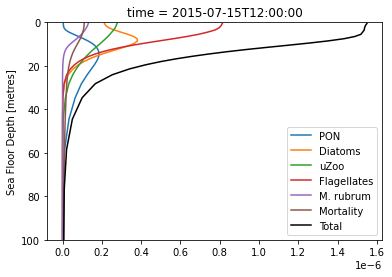

In [54]:
fig, ax = plt.subplots(1, 1)
uZoo_graz_PON[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='PON');
uZoo_graz_diatoms[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='Diatoms');
uZoo_graz_uzoo[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='uZoo');
uZoo_graz_flag[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='Flagellates');
uZoo_graz_mrub[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='M. rubrum');
mort_to_PON[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='Mortality');
total_from_uZoo = (uZoo_graz_PON[:].mean(axis=1).mean(axis=1) + uZoo_graz_diatoms[:].mean(axis=1).mean(axis=1) +
         uZoo_graz_uzoo[:].mean(axis=1).mean(axis=1) + uZoo_graz_flag[:].mean(axis=1).mean(axis=1) +
         uZoo_graz_mrub[:].mean(axis=1).mean(axis=1) + mort_to_PON[:].mean(axis=1).mean(axis=1))
total_from_uZoo.plot(
    ax=ax, c='k', y='depth', yincrease=False, label='Total');
ax.legend();
ax.set_ylim(100, 0);

## From Mesozooplankton ##

In [52]:
eff = 0.
sloppy = 1 - eff
pontrans = 1
trans = 0.47
MZoo_graz_PON = dia2.GRMESZPON[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * pontrans
MZoo_graz_diatoms = dia2.GRMESZDIAT[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * trans
MZoo_graz_uzoo = dia2.GRMESZMICZ[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * trans
MZoo_graz_flag = dia2.GRMESZPHY[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * trans
MZoo_graz_mrub = dia2.GRMESZMRUB[0, :, SoG_center[0]:SoG_center[1], SoG_center[2]:SoG_center[3]] * sloppy * trans

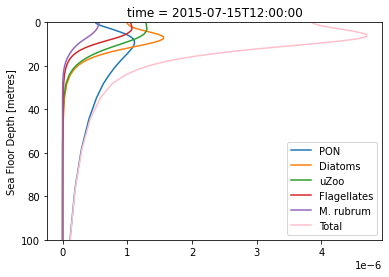

In [55]:
fig, ax = plt.subplots(1, 1)
MZoo_graz_PON[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='PON');
MZoo_graz_diatoms[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='Diatoms');
MZoo_graz_uzoo[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='uZoo');
MZoo_graz_flag[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='Flagellates');
MZoo_graz_mrub[:].mean(axis=1).mean(axis=1).plot(ax=ax, y='depth', yincrease=False, label='M. rubrum');
total_from_MZ = (MZoo_graz_PON[:].mean(axis=1).mean(axis=1) + MZoo_graz_diatoms[:].mean(axis=1).mean(axis=1) +
         MZoo_graz_uzoo[:].mean(axis=1).mean(axis=1) + MZoo_graz_flag[:].mean(axis=1).mean(axis=1))
total_from_MZ.plot(
    ax=ax, c='pink', y='depth', yincrease=False, label='Total');
ax.legend();
ax.set_ylim(100, 0);

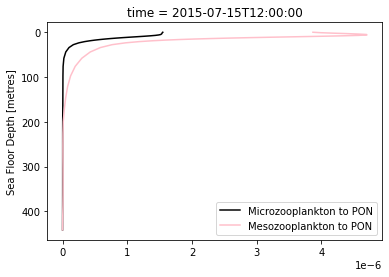

In [57]:
fig, ax = plt.subplots(1, 1)
total_from_uZoo.plot(
    ax=ax, c='k', y='depth', yincrease=False, label='Microzooplankton to PON');
total_from_MZ.plot(
    ax=ax, c='pink', y='depth', yincrease=False, label='Mesozooplankton to PON');
ax.legend();